## 0. Setting up the notebook

In [1]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) \n[GCC 7.2.0]'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the data

In [3]:
train_auto = pd.read_csv('train_auto.csv')
test_auto = pd.read_csv('test_auto.csv')

## 2. Cleaning and making sense of data

In [4]:
train_auto.shape

(8161, 26)

In [5]:
test_auto.shape

(2141, 26)

In [6]:
train_auto.TARGET_FLAG.describe()

count    8161.000000
mean        0.263816
std         0.440728
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: TARGET_FLAG, dtype: float64

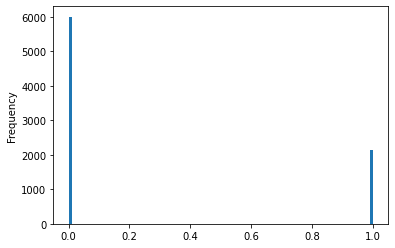

In [7]:
train_auto.TARGET_FLAG.plot.hist(bins=100); # TARGET_FLAG is a binary variable taking values (0, 1)

In [8]:
test_auto.TARGET_FLAG.dropna() # only NAN values in the target variable in the dataset "test_auto"

Series([], Name: TARGET_FLAG, dtype: float64)

In [9]:
train_auto.head() # taking a look at the other variables within our dataset

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


#### First comments:
- We have a single **target variable** 'TARGET_FLAG' which is a **binary variable**
- We have 24 **explanatory variables** (some are numerical, some categorical)
- The dataset **"test_auto"** does not contain the target variable, I will not use it to test the performance of the models, but rather divide the dataset "train_auto" in a **training part** (used to train models) and a **test part** (used to test models)
- I will use the dataset **"test_auto"** only later to test the upload on Kaggle

### 2.1 How to handle missing data?

In [10]:
train_auto.isnull().sum().sort_values(ascending=False).head(7) # missing data

JOB           526
CAR_AGE       510
HOME_VAL      464
YOJ           454
INCOME        445
AGE             6
URBANICITY      0
dtype: int64

#### First observations about missing data
- NaN values are present in both numerical(ex. CAR_AGE) and categorical variables (ex JOB). 
- When missing data are very frequent in a specific variable, a solution could be to just discard that variable entirely in the whole analysis. We could do it here because only 6 variables have missing data. However I won't do it because: 
  - Missing data are present in variables around only ~500 times out of ~8000 occurrences (~6% of occurrences, so **missing data are not frequent**).
  - The variables with missing data are "JOB", "CAR_AGE", "HOME_VAL", "YOJ", "INCOME". By intuition these variables **seems to be higly relevant** for a car insurance deal. We will double check this later when we will look at correlations with the target variable.

### 2.2 How to handle non numerical values
We will first turn all values to numerical values before handling missing data. This will allow us to compute correlations and understand how we can better treat missing data.
- We will **convert monetary variables** directly to **numerical variables** 
- We will **create dummy variables** for the categorical variables (Ex. the variable RED_CAR can assume the values ('yes','no'). We will create a variable RED_CAR.yes which can be 0 or 1, and a variable RED_CAR.no which can be 0 or 1. Later we will discard this variable RED_CAR.no because it will be redundant)

In [11]:
train_auto.dtypes

INDEX            int64
TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME          object
PARENT1         object
HOME_VAL        object
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK        object
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM        object
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

#### Turning monetary values to numerical

In [12]:
train_auto[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']] = train_auto[
    ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']].replace('[\$,]', '', regex=True).astype(float)

#### Creating dummy variables for categorical variables

In [13]:
train_auto_dummies = train_auto
train_auto_dummies = pd.get_dummies(train_auto_dummies, prefix='PARENT1', prefix_sep='.', columns=['PARENT1'])
train_auto_dummies = pd.get_dummies(train_auto_dummies, prefix='MSTATUS', prefix_sep='.', columns=['MSTATUS'])
train_auto_dummies = pd.get_dummies(train_auto_dummies, prefix='SEX', prefix_sep='.', columns=['SEX'])
train_auto_dummies = pd.get_dummies(train_auto_dummies, prefix='EDUCATION', prefix_sep='.', columns=['EDUCATION'])
train_auto_dummies = pd.get_dummies(train_auto_dummies, prefix='JOB', prefix_sep='.', columns=['JOB'])
train_auto_dummies = pd.get_dummies(train_auto_dummies, prefix='CAR_USE', prefix_sep='.', columns=['CAR_USE'])
train_auto_dummies = pd.get_dummies(train_auto_dummies, prefix='CAR_TYPE', prefix_sep='.', columns=['CAR_TYPE'])
train_auto_dummies = pd.get_dummies(train_auto_dummies, prefix='RED_CAR', prefix_sep='.', columns=['RED_CAR'])
train_auto_dummies = pd.get_dummies(train_auto_dummies, prefix='REVOKED', prefix_sep='.', columns=['REVOKED'])
train_auto_dummies = pd.get_dummies(train_auto_dummies, prefix='URBANICITY', prefix_sep='.', columns=['URBANICITY'])



In [14]:
train_auto_dummies.head() # taking a look at dummy variables

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,...,CAR_TYPE.Pickup,CAR_TYPE.Sports Car,CAR_TYPE.Van,CAR_TYPE.z_SUV,RED_CAR.no,RED_CAR.yes,REVOKED.No,REVOKED.Yes,URBANICITY.Highly Urban/ Urban,URBANICITY.z_Highly Rural/ Rural
0,1,0,0.0,0,60.0,0,11.0,67349.0,0.0,14,...,0,0,0,0,0,1,1,0,1,0
1,2,0,0.0,0,43.0,0,11.0,91449.0,257252.0,22,...,0,0,0,0,0,1,1,0,1,0
2,4,0,0.0,0,35.0,1,10.0,16039.0,124191.0,5,...,0,0,0,1,1,0,1,0,1,0
3,5,0,0.0,0,51.0,0,14.0,NaN,306251.0,32,...,0,0,0,0,0,1,1,0,1,0
4,6,0,0.0,0,50.0,0,NaN,114986.0,243925.0,36,...,0,0,0,1,1,0,0,1,1,0


#### We have now 49 columns. We can reduce the number of dummy variables by removing one variable for each of the original categorical variables:
- Ex. Since we already have RED_CAR.yes which is 0 or 1 is useless to have another variable RED_CAR.no.
- We won't apply this to the the variable having several missing data: JOB. Keeping all the dummy variables will keep track of missing data.

In [15]:
train_auto_drop=train_auto_dummies.drop(['PARENT1.No','MSTATUS.z_No','SEX.z_F',
                                        'EDUCATION.z_High School', 
                                         'CAR_USE.Commercial', 'CAR_TYPE.z_SUV', 'RED_CAR.no', 
                                         'REVOKED.No', 'URBANICITY.z_Highly Rural/ Rural'], axis=1)


In [16]:
train_auto_drop.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,...,JOB.z_Blue Collar,CAR_USE.Private,CAR_TYPE.Minivan,CAR_TYPE.Panel Truck,CAR_TYPE.Pickup,CAR_TYPE.Sports Car,CAR_TYPE.Van,RED_CAR.yes,REVOKED.Yes,URBANICITY.Highly Urban/ Urban
0,1,0,0.0,0,60.0,0,11.0,67349.0,0.0,14,...,0,1,1,0,0,0,0,1,0,1
1,2,0,0.0,0,43.0,0,11.0,91449.0,257252.0,22,...,1,0,1,0,0,0,0,1,0,1
2,4,0,0.0,0,35.0,1,10.0,16039.0,124191.0,5,...,0,1,0,0,0,0,0,0,0,1
3,5,0,0.0,0,51.0,0,14.0,NaN,306251.0,32,...,1,1,1,0,0,0,0,1,0,1
4,6,0,0.0,0,50.0,0,NaN,114986.0,243925.0,36,...,0,1,0,0,0,0,0,0,1,1


#### We still have missing data. Now they are all numerical. Should we delete these variables?
- When we have only few variables that present missing data, a possibility is to remove all these variables alltogheter. This is the best choice when a large part of the data is missing.
- I notice that these variables (CAR_AGE, HOME_VAL, INCOME, AGE) are the ones that have a strong negative correlation with our Target variable. 
- Since the data missing are not many (~6%), I would not remove these variables

In [17]:
train_auto_drop.isnull().sum().sort_values(ascending=False).head(6) # missing data

CAR_AGE                           510
HOME_VAL                          464
YOJ                               454
INCOME                            445
AGE                                 6
URBANICITY.Highly Urban/ Urban      0
dtype: int64

In [18]:
train_auto_drop.dropna().corr()['TARGET_FLAG'].sort_values(ascending=True).head(10)

HOME_VAL            -0.180141
CAR_USE.Private     -0.144823
CAR_TYPE.Minivan    -0.138679
INCOME              -0.137238
MSTATUS.Yes         -0.134028
JOB.Manager         -0.115218
AGE                 -0.112937
CAR_AGE             -0.106247
BLUEBOOK            -0.105811
EDUCATION.Masters   -0.085418
Name: TARGET_FLAG, dtype: float64

### 2.3 Filling missing data. Are missing data random?
- It's particularly dangerous to ignore missing data when they are not random. This is the case when the subset of our dataset with missing data is statistically different from the rest of the sample. We will check here that this is not the case with particular reference to the 'TARGET_FLAG', checking that when we condition the average of our target variable on the instances where we have missing data, the averages do not change significantly
- When missing data are random (distribution conditional to the fact that data is missing is comparable to the entire sample) we can fill missing data.
- In this case I quickly check the mean of our Target variable, conditional to the fact that the data is missing, and the deviations seems quite small (<10% on samples of <500 observations)
- For this reason, **I will just substitute null values with median values**. 

**2 ways to improve this treatmeant that could potentially improve the models**:
- A way to improve this would require to look at correlations between the variables that display missing data and other variables, in order to improve the methodology to fill the data(ex. missing data on 'INCOME' could be more likely when the person has a given 'JOB' type? or when the insurance contract refer to a given 'CAR_USE'?) 
- Another possibility to improve this would be to  add additional dummy variables to highlight the fact that the data is missing (ex. a new variable 'CAR_AGE.NULL' taking value 1 when 'CAR_AGE' is missing and 0 otherwise 

In [19]:
var = 'CAR_AGE'
median= train_auto_drop[var].median()
print("averages conditional to  the variable", var)
print("average: ", train_auto_drop['TARGET_FLAG'].dropna().mean())
print("average for NaN: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var].isna()).dropna().mean())
print("average for > median: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var]>median).dropna().mean())
print("average for < median: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var]<median).dropna().mean())

averages conditional to  the variable CAR_AGE
average:  0.2638157088592084
average for NaN:  0.2784313725490196
average for > median:  0.22110960757780784
average for < median:  0.3038900263234864


In [20]:
var = 'HOME_VAL'
median= train_auto_drop[var].median()
print("averages conditional to the variable", var)
print("average: ", train_auto_drop['TARGET_FLAG'].dropna().mean())
print("average for NaN: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var].isna()).dropna().mean())
print("average for > median: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var]>median).dropna().mean())
print("average for < median: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var]<median).dropna().mean())

averages conditional to the variable HOME_VAL
average:  0.2638157088592084
average for NaN:  0.2607758620689655
average for > median:  0.19646569646569648
average for < median:  0.3316008316008316


In [21]:
var ='YOJ'
median= train_auto_drop[var].median()
print("averages conditional to the variable", var)
print("average: ", train_auto_drop['TARGET_FLAG'].dropna().mean())
print("average for NaN: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var].isna()).dropna().mean())
print("average for > median: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var]>median).dropna().mean())
print("average for < median: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var]<median).dropna().mean())

averages conditional to the variable YOJ
average:  0.2638157088592084
average for NaN:  0.2709251101321586
average for > median:  0.241635687732342
average for < median:  0.2978216473791695


In [22]:
var ='INCOME'
median= train_auto_drop[var].median()
print("averages conditional to the variable", var)
print("average: ", train_auto_drop['TARGET_FLAG'].dropna().mean())
print("average for NaN: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var].isna()).dropna().mean())
print("average for > median: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var]>median).dropna().mean())
print("average for < median: ", train_auto_drop['TARGET_FLAG'].where(train_auto_drop[var]<median).dropna().mean())

averages conditional to the variable INCOME
average:  0.2638157088592084
average for NaN:  0.24719101123595505
average for > median:  0.2094892403422349
average for < median:  0.319678506611356


In [23]:
#subsitution of NaN with median values
train_auto_clean = train_auto_drop.fillna(train_auto_drop.median())

## 3. Creating a training and test dataset (out of the "train_auto") and check that the two are statistically similar

#### Creating train and test dataset:
- I will use 50% of the dataset for training the model, and 50% to test the predictions
- Since the ordering of the dataset can be non random, the split could create two samples with different statistical properites. In order to make sure this is not the case I will check the differences (ratio) between the average of all variables between the train and test datasets. These differences are quite small (<10%) and largest in variables whose mean are small

In [24]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(train_auto_clean, test_size=0.3)

In [25]:
average_percentage_differences= pd.DataFrame()
average_percentage_differences['% diff in averages']=((train.mean()-test.mean()) / test.mean())
average_percentage_differences['average']=test.mean()
average_percentage_differences.sort_values(['% diff in averages'])

,% diff in averages,average
JOB.Doctor,-0.126628,0.033075
JOB.Student,-0.118586,0.095141
JOB.Lawyer,-0.117379,0.111474
JOB.Clerical,-0.093117,0.166599
CAR_TYPE.Van,-0.071954,0.096774
PARENT1.Yes,-0.062593,0.138016
EDUCATION.<High School,-0.053328,0.153124
REVOKED.Yes,-0.050140,0.126991
CAR_TYPE.Sports Car,-0.034936,0.113924
HOMEKIDS,-0.032949,0.738261


## 4. Testing a logistic regression

#### The logistic regression is the simplest model to implement for the classification of binary variables. The probability of the target variable being 1 is considered as a linear combination of the explanatory variables


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
X_train = train.drop(['TARGET_FLAG','INDEX'], axis=1)
Y_train = train['TARGET_FLAG']
X_test  = test.drop(['TARGET_FLAG','INDEX'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((5712, 38), (5712,), (2449, 38))

In [28]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
#Regression score
print(logreg.score(X_train, Y_train))

0.9994747899159664


In [30]:
#Out of sample score
Y_pred = logreg.predict(X_test)
Y_test = test['TARGET_FLAG']
(Y_pred==Y_test).mean()

0.9983666802776644

#### This score is a bit too good to be true, after looking into the data I notice that:
- in the "test_auto" dataset also the variable "TARGET_AMT" is missing for all data
- the sign of the variable "TARGET_AMT" is actually the same as "TARGET_FLAG" 
- We do the regression again by removing such variable 

In [31]:
(np.sign(train_auto_clean['TARGET_AMT'])==np.sign(train_auto_clean['TARGET_FLAG'])).mean()
# the sign of the variable "TARGET_AMT" is actually the same as "TARGET_FLAG"

1.0

In [32]:
# new train and test removing 'TARGET_AMT'
X_train = train.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1)
Y_train = train['TARGET_FLAG']
X_test  = test.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1).copy()

In [33]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print(logreg.score(X_train, Y_train))

0.738795518207283


In [34]:
#Out of sample score
Y_pred = logreg.predict(X_test)
Y_test = test['TARGET_FLAG']
(Y_pred==Y_test).mean()

0.7378521845651286

#### Prepare the Test submission on Kaggle, clean the test_auto dataset as well

In [35]:
test_auto[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']] = test_auto[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']].replace('[\$,]', '', regex=True).astype(float)

In [36]:
test_auto_dummies = test_auto
test_auto_dummies = pd.get_dummies(test_auto_dummies, prefix='PARENT1', prefix_sep='.', columns=['PARENT1'])
test_auto_dummies = pd.get_dummies(test_auto_dummies, prefix='MSTATUS', prefix_sep='.', columns=['MSTATUS'])
test_auto_dummies = pd.get_dummies(test_auto_dummies, prefix='SEX', prefix_sep='.', columns=['SEX'])
test_auto_dummies = pd.get_dummies(test_auto_dummies, prefix='EDUCATION', prefix_sep='.', columns=['EDUCATION'])
test_auto_dummies = pd.get_dummies(test_auto_dummies, prefix='JOB', prefix_sep='.', columns=['JOB'])
test_auto_dummies = pd.get_dummies(test_auto_dummies, prefix='CAR_USE', prefix_sep='.', columns=['CAR_USE'])
test_auto_dummies = pd.get_dummies(test_auto_dummies, prefix='CAR_TYPE', prefix_sep='.', columns=['CAR_TYPE'])
test_auto_dummies = pd.get_dummies(test_auto_dummies, prefix='RED_CAR', prefix_sep='.', columns=['RED_CAR'])
test_auto_dummies = pd.get_dummies(test_auto_dummies, prefix='REVOKED', prefix_sep='.', columns=['REVOKED'])
test_auto_dummies = pd.get_dummies(test_auto_dummies, prefix='URBANICITY', prefix_sep='.', columns=['URBANICITY'])


In [37]:
test_auto_drop=test_auto_dummies.drop(['PARENT1.No','MSTATUS.z_No','SEX.z_F',
                                        'EDUCATION.z_High School', 
                                         'CAR_USE.Commercial', 'CAR_TYPE.z_SUV', 'RED_CAR.no', 
                                         'REVOKED.No', 'URBANICITY.z_Highly Rural/ Rural'], axis=1)


In [38]:
test_auto_clean = test_auto_drop.fillna(test_auto_drop.mean())

In [39]:
train, test = train_test_split(train_auto_clean, test_size=0.0)

X_train = train.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1)
Y_train = train['TARGET_FLAG']
X_test  = test.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_sub = logreg.predict(test_auto_clean.drop(['TARGET_FLAG','TARGET_AMT', 'INDEX'], axis=1))
df_sub = pd.DataFrame(index=test_auto_clean.INDEX, columns=['p_target'])
df_sub['p_target']=Y_sub

In [40]:
df_sub.to_csv('~/Desktop/WORK/decartes tech test/auto-insurance-fall-2017/df_sub.csv')

## 5. Improving the regression 1: Give it a try to non-linear models

#### Few non-linear models are tested to see if  they outpeform the Logistic Regression. The Random Forest seems to quite outperform Logstic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

/home/valerio/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [42]:
train, test = train_test_split(train_auto_clean, test_size=0.3)

X_train = train.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1)
Y_train = train['TARGET_FLAG']
X_test  = test.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((5712, 37), (5712,), (2449, 37))

In [43]:
# Support Vector Machines

svc = SVC();
svc.fit(X_train, Y_train);
#Out of sample score
Y_pred = svc.predict(X_test);
Y_test = test['TARGET_FLAG']
print((Y_pred==Y_test).mean())

0.7398938342180482


In [44]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100);
random_forest.fit(X_train, Y_train);
#Out of sample score
Y_pred = random_forest.predict(X_test);
Y_test = test['TARGET_FLAG'];
print((Y_pred==Y_test).mean())

0.7905267456104532


In [45]:
# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30);
knn.fit(X_train, Y_train);
#Out of sample score
Y_pred = knn.predict(X_test);
Y_test = test['TARGET_FLAG'];
print((Y_pred==Y_test).mean())

0.7460187831768068


#### Submit on Kaggle the Random Forest model, trained on the whole 'train_auto' dataset

In [46]:
#Best submission
train, test = train_test_split(train_auto_clean, test_size=0.0)

X_train = train.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1)
Y_train = train['TARGET_FLAG']
X_test  = test.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_sub2 = random_forest.predict(test_auto_clean.drop(['TARGET_FLAG','TARGET_AMT', 'INDEX'], axis=1))
df_sub2 = pd.DataFrame(index=test_auto_clean.INDEX, columns=['p_target'])
df_sub2['p_target']=Y_sub2

In [47]:
df_sub2.to_csv('~/Desktop/WORK/decartes tech test/auto-insurance-fall-2017/df_sub2.csv')

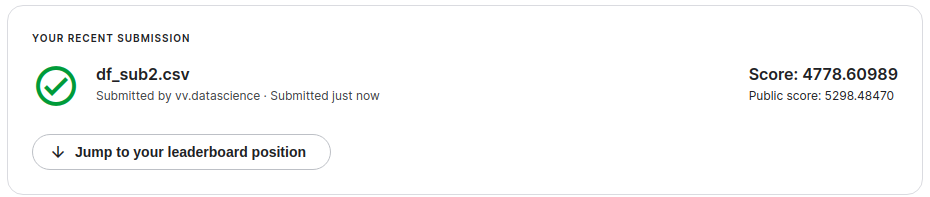

## Improving the Regression 2: Renormalise numerical float variables using quantiles

#### Other than trying with non linear models, another approach that is usually improving the performance of ML models is to reduce the complexity of the present data, renormalizing the distribution of the data
- We will test this approach by **clustering the numerical variables that are not integer (float) in few groups**. Ex. instead of looking at all values for 'AGE' we will divide our clients in few age groups. 
- We will use (0%, 25%, 50%, 75%, 100%) quantiles to bin the data
- We won't use the 25% quantile in 'HOME VAL' because it is the same as the 0%, we won't apply this to the variable 'OLDCLAIM' because it's very skewed.

There are few others similar approaches commonly used, including
- Substitute numerical values with rankings
- Normalizing the data

In [48]:
import copy
train_auto_renormalized = copy.deepcopy(train_auto_clean)
vars_float = ['AGE','YOJ','INCOME','HOME_VAL','BLUEBOOK','CAR_AGE']
for var in vars_float:
    s = train_auto_renormalized[var]
    if (var=='HOME_VAL'):
        bins=(s.quantile(0.25)-0.01,s.quantile(0.5),s.quantile(0.75),s.quantile(1)+0.01)
        categories = pd.cut(s, bins, labels=[1,2,3])
        #categories = pd.cut(s, bins)
    else:
        bins=(s.quantile(0.0)-0.01, s.quantile(0.25),s.quantile(0.5),s.quantile(0.75),s.quantile(1)+0.01)    
        categories = pd.cut(s, bins, labels=[1,2,3,4])
    train_auto_renormalized[var] = categories

In [49]:
train_auto_renormalized.head()
# we renormalized the data dividing continuos variables (like AGE) into 4 quantiles

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,...,JOB.z_Blue Collar,CAR_USE.Private,CAR_TYPE.Minivan,CAR_TYPE.Panel Truck,CAR_TYPE.Pickup,CAR_TYPE.Sports Car,CAR_TYPE.Van,RED_CAR.yes,REVOKED.Yes,URBANICITY.Highly Urban/ Urban
0,1,0,0.0,0,4,0,2,3,1,14,...,0,1,1,0,0,0,0,1,0,1
1,2,0,0.0,0,2,0,2,4,3,22,...,1,0,1,0,0,0,0,1,0,1
2,4,0,0.0,0,1,1,2,1,1,5,...,0,1,0,0,0,0,0,0,0,1
3,5,0,0.0,0,3,0,4,2,3,32,...,1,1,1,0,0,0,0,1,0,1
4,6,0,0.0,0,3,0,2,4,3,36,...,0,1,0,0,0,0,0,0,1,1


#### The variables ['AGE','YOJ','INCOME','HOME_VAL','BLUEBOOK','CAR_AGE'] are now divided into groups rather than have numerical values

In [50]:
train, test = train_test_split(train_auto_renormalized, test_size=0.3)

In [51]:
X_train = train.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1)
Y_train = train['TARGET_FLAG']
X_test  = test.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((5712, 37), (5712,), (2449, 37))

In [52]:
# Logistic Regression
logreg = LogisticRegression();
logreg.fit(X_train, Y_train);

#Out of sample score
Y_pred = logreg.predict(X_test);
Y_test = test['TARGET_FLAG'];
(Y_pred==Y_test).mean()

0.7790935075541037

In [53]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100);
random_forest.fit(X_train, Y_train);

#Out of sample score
Y_pred = random_forest.predict(X_test);
Y_test = test['TARGET_FLAG'];
(Y_pred==Y_test).mean()

0.7933850551245406

#### After renormalizing the float variables, the Logistic Regression score significantly improves (it is comparable now to the random forest). I will test a Kaggle submission using Logistic Regression

In [54]:
import copy
test_auto_renormalized = copy.deepcopy(test_auto_clean)
vars_float = ['AGE','YOJ','INCOME','HOME_VAL','BLUEBOOK','CAR_AGE']
for var in vars_float:
    s = test_auto_renormalized[var]
    if (var=='HOME_VAL'):
        bins=(s.quantile(0.25)-0.01,s.quantile(0.5),s.quantile(0.75),s.quantile(1)+0.01)
        categories = pd.cut(s, bins, labels=[1,2,3])
    else:
        bins=(s.quantile(0.0)-0.01, s.quantile(0.25),s.quantile(0.5),s.quantile(0.75),s.quantile(1)+0.01)    
        categories = pd.cut(s, bins, labels=[1,2,3,4])
    test_auto_renormalized[var] = categories

In [65]:
#Best submission
train, test = train_test_split(train_auto_renormalized, test_size=0.0)

X_train = train.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1)
Y_train = train['TARGET_FLAG']
X_test  = test.drop(['TARGET_FLAG','TARGET_AMT','INDEX'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

# random_forest

random_forest = RandomForestClassifier(n_estimators=100);
random_forest.fit(X_train, Y_train);

Y_sub3 = random_forest.predict(test_auto_renormalized.drop(['TARGET_FLAG','TARGET_AMT', 'INDEX'], axis=1))
df_sub3 = pd.DataFrame(index=test_auto_renormalized.INDEX, columns=['p_target'])
df_sub3['p_target']=Y_sub3

In [66]:
df_sub3.to_csv('~/Desktop/WORK/decartes tech test/auto-insurance-fall-2017/df_sub3.csv')

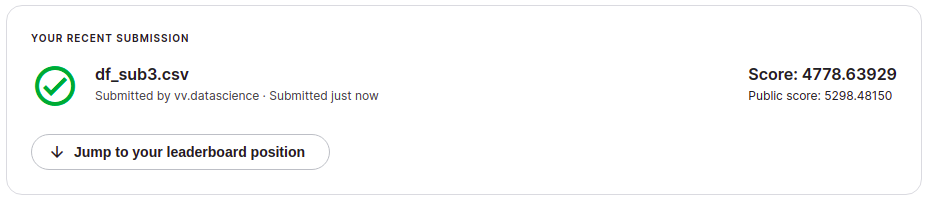

#### Unfortunately this does not seem to improve on the Kaggle test dataset